<a href="https://colab.research.google.com/github/sabumjung/Machine-Learning-Algorithm/blob/master/ch09_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.cluster import KMeans

from scipy.spatial.distance import pdist

In [0]:
# For reproducibility
np.random.seed(1000)

nb_samples = 1000

In [0]:
def show_dataset(X):
    fig, ax = plt.subplots(1, 1, figsize=(30, 25))

    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    for i in range(nb_samples):
        if Y[i] == 0:
            ax.scatter(X[i, 0], X[i, 1], marker='o', color='r')
        else:
            ax.scatter(X[i, 0], X[i, 1], marker='^', color='b')

    plt.show()


def show_clustered_dataset(X, km):
    fig, ax = plt.subplots(1, 1, figsize=(30, 25))

    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    for i in range(nb_samples):
        c = km.predict(X[i].reshape(1, -1))
        if c == 0:
            ax.scatter(X[i, 0], X[i, 1], marker='o', color='r')
        else:
            ax.scatter(X[i, 0], X[i, 1], marker='^', color='b')

    plt.show()

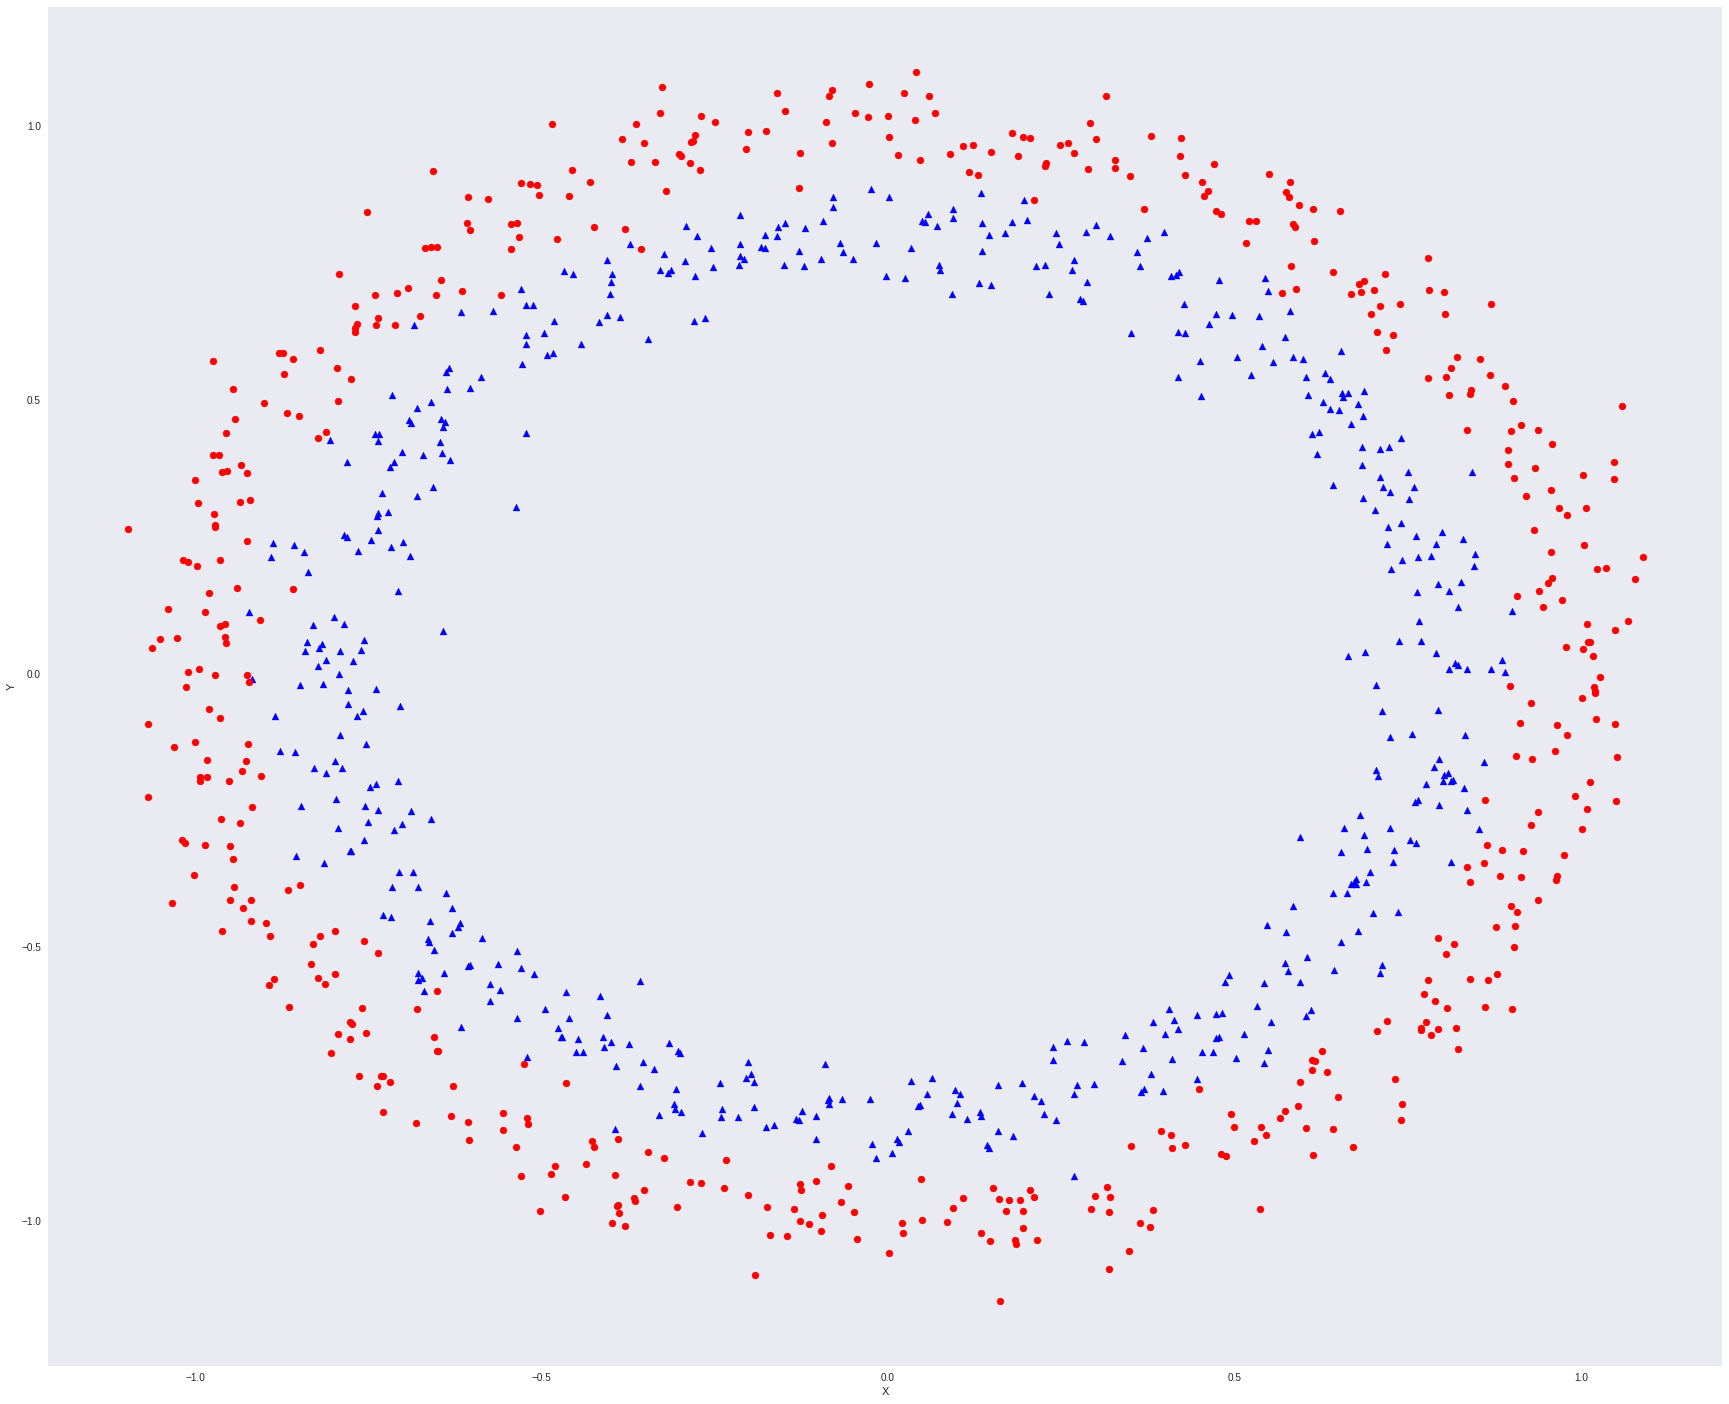

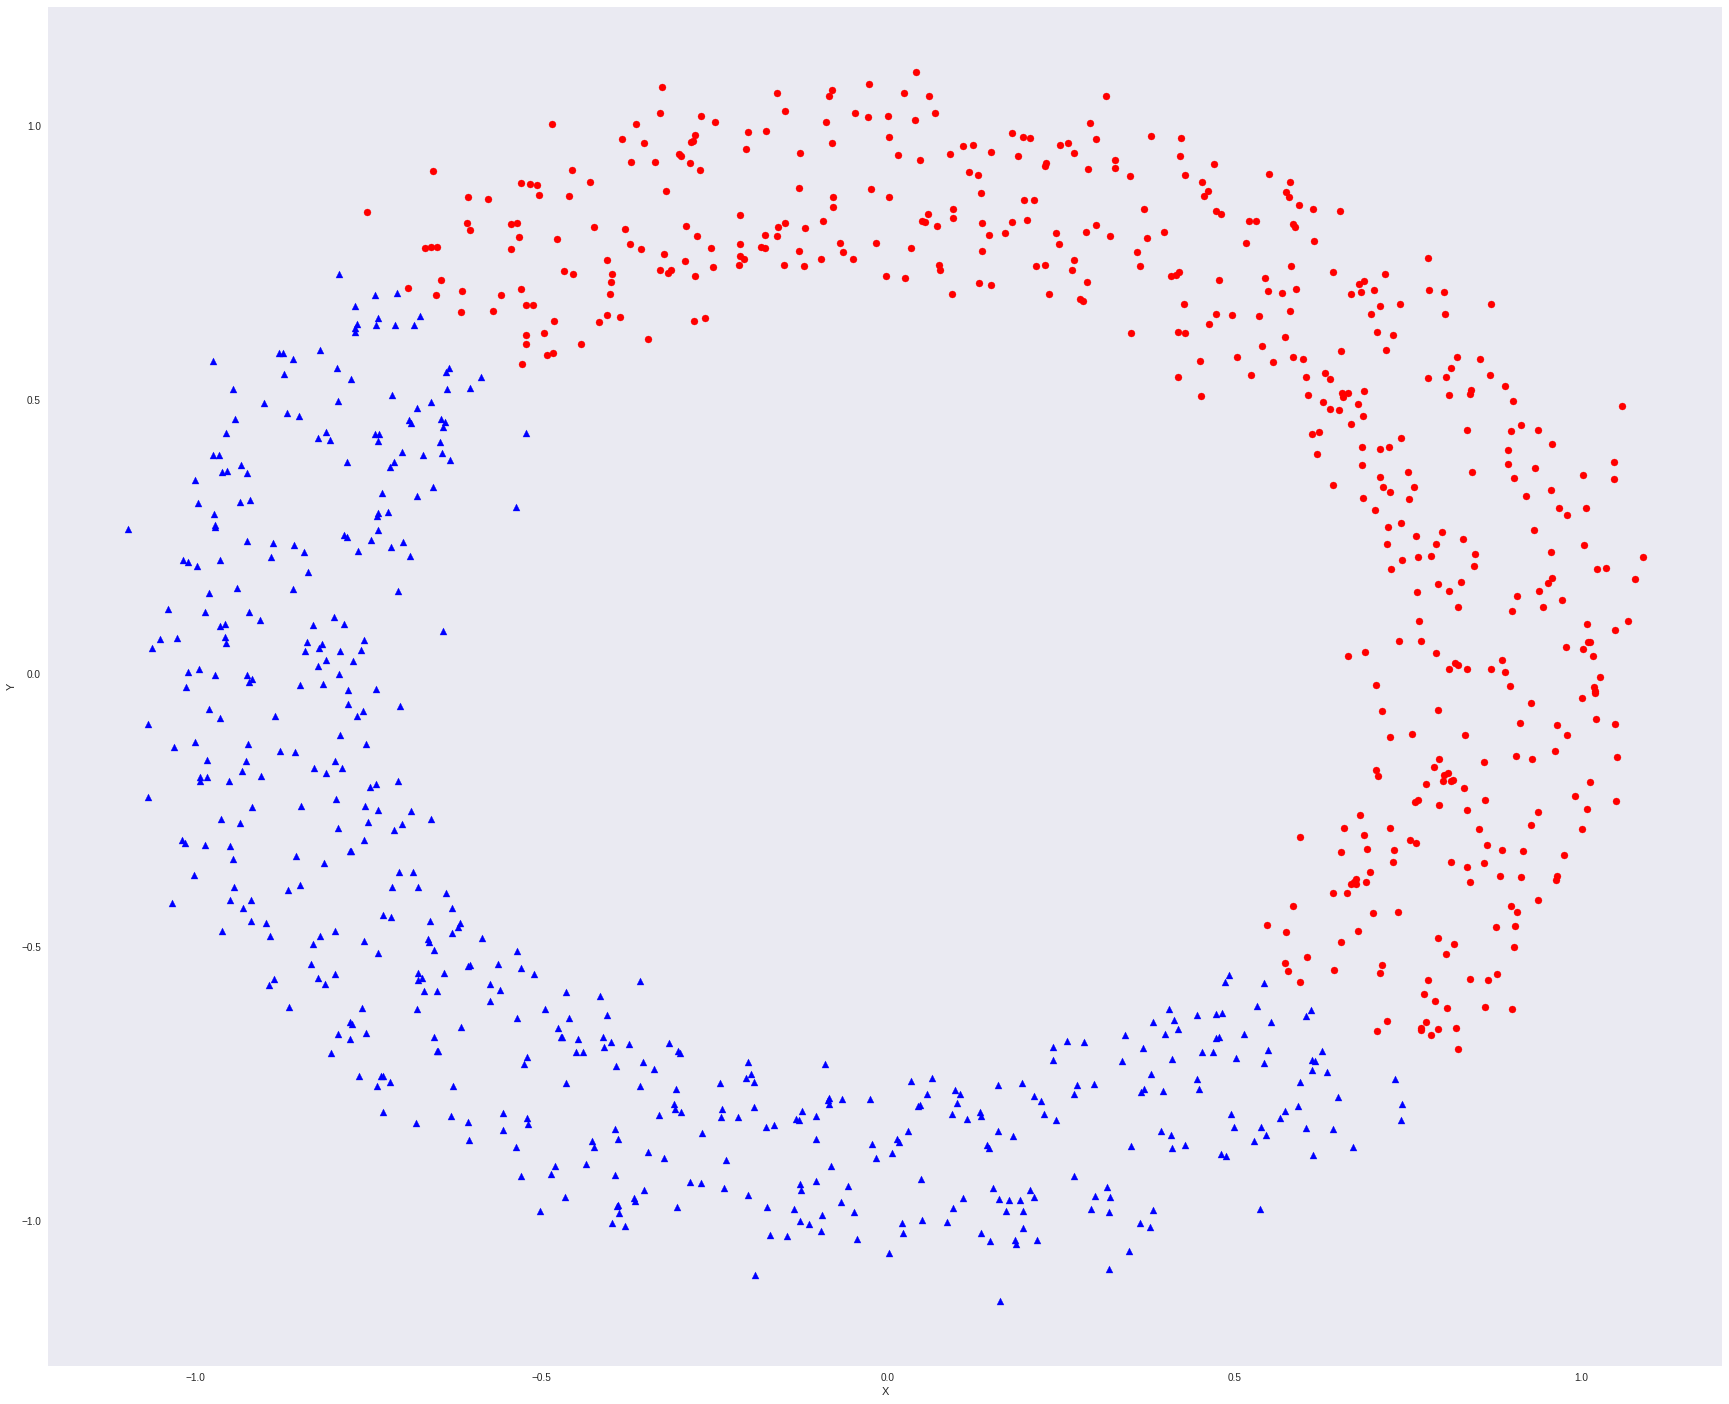

True average distance: 1.281
Clustering agerage distance: 0.175


In [44]:
# Create dataset
X, Y = make_circles(n_samples=nb_samples, noise=0.05)

# Show dataset
show_dataset(X)

# Create and train K-Means
km = KMeans(n_clusters=2)
km.fit(X)

# Show clustered dataset
show_clustered_dataset(X, km)

# Compute the average intra-cluster distances
Y_pred = km.predict(X)

sampled_X = np.random.choice(X[Y_pred == 0, 0], replace=False, size=300).astype(np.int32)

true_distances = pdist(X[Y == 0], metric='euclidean')
distances = pdist(X[sampled_X], metric='euclidean')

print('True average distance: %.3f' % np.mean(true_distances))
print('Clustering agerage distance: %.3f' % np.mean(distances))